# GATE output formats and Python

## GATE can output information in different formats:
* ASCII output
* Binary output
* Images (mhd, hdr) output
* ROOT tree output
* NumPy tree output (new!)

From actors https://opengate.readthedocs.io/en/latest/tools_to_interact_with_the_simulation_actors.html

and from "systems" (scanner, CT, SPECT, PET, ...) https://opengate.readthedocs.io/en/latest/data_output_management.html

We will first have a look at a GATE example to understand these outputs

Run the example Ex_beam

Analyse the outputs with this Python notebook

# GATE ASCII output


## 1D DoseActor (along Z)

In [112]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
# Load data from txt files
d_edep = np.loadtxt('Ex_Beam/output/1D-depth-Edep.txt')
d_uncert = np.loadtxt('Ex_Beam/output/1D-depth-Edep-Uncertainty.txt')

## Plot depth dose and uncertainty

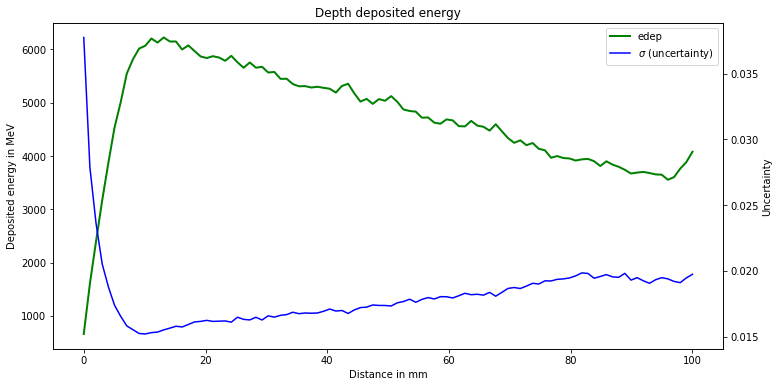

In [114]:
# Declare a single figure (one row, one column)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 6), facecolor='w')

# X values from 0 to n
# n is the length of d_edep
n = len(d_edep)
x = np.linspace(0, n, n)

# First curve, gamma depth in green
y = d_edep
c1 = ax.plot(x, y, 'g-', label='edep', linewidth=2)

# Second curve, gamma uncertainty in blue, share the same x axis, but use a
# different y axis
y = d_uncert
ax2 = ax.twinx()
c2 = ax2.plot(x, y, 'b-', label='$\sigma$ (uncertainty)')

# Add the legend and the title
lns = c1+c2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
ax.set_title('Depth energy profile')
ax.set_xlabel('Distance in mm')
ax.set_ylabel('Deposited energy in MeV')
f = ax2.set_ylabel('Uncertainty')

# GATE image output

## 3D DoseActor - format mhd/raw

In [116]:
import SimpleITK as sitk

img_dose = sitk.ReadImage('Ex_Beam/output/3D-Edep.mhd')
arr_dose = sitk.GetArrayFromImage(img_dose)
print('Image size = ', arr_dose.shape)
print('Image min and max: ',  np.amin(arr_dose), np.amax(arr_dose))

Image size =  (50, 50, 50)
Image min and max:  0.0 2264.5


In [126]:
arr_dose

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.28146961e-01, 1.59078464e-01, 0.00000000e+00],
        [4.74147266e-03, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.61502059e-02, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.99060634e-01, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 4.05122861e-02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 

## Exercise
* make the same plot as previous section with this 3D data
* make a profile plot
* display a slice of the 3D data with plt.imshow (optional)

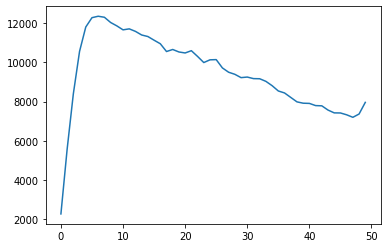

In [121]:
p_edep = arr_dose.sum(axis=(2,1))
plt.plot(p_edep)

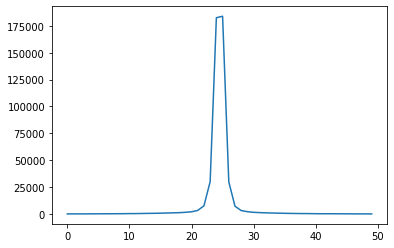

In [127]:
p_edep = arr_dose.sum(axis=(0,1))
plt.plot(p_edep)

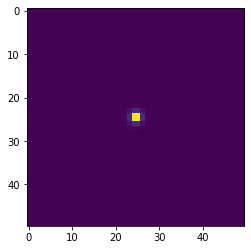

In [128]:
plt.imshow(arr_dose.sum(axis=0))

# GATE list of interactions

## Binary format

In [105]:
import numpy as np

# dtype line format for "scanner" GATE system binary output (26 columns)
dt=np.dtype([('run_ID', np.int32), ('event_ID', np.int32), ('primary_ID', np.int32), ('source_ID', np.int32), 
             ('level1_ID', np.int32), ('level2_ID', np.int32), ('level3_ID', np.int32), ('level4_ID', np.int32), 
             ('level5_ID', np.int32), ('layer0_ID', np.int32), ('layer1_ID', np.int32), 
             ('time', np.float64), ('energy', np.float64), ('range', np.float64), 
             ('x', np.float64), ('y', np.float64), ('z', np.float64), 
             ('G4code', np.int32), ('particle_ID', np.int32), ('mother_particle_ID', np.int32), ('photon_mother_ID', np.int32), 
             ('n_Compt', np.int32), ('n_Rayl', np.int32), 
             ('process', np.dtype('S8')), ('vol_Compt', np.dtype('S8')), ('vol_Rayl', np.dtype('S8'))])

data=np.fromfile('Ex_Beam/output/list-Hits.bin', dtype=dt)
print('Number of particles:', len(data))
print(data)

Number of particles: 60300
[(0,     9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1.00002857e-04, 4.27473101, 0.51712216,  45.35125958,  -2.14465462, 449.99260566, 22, 1, 0, 0, 0, 0, b'compt', b'NULL', b'NULL')
 (0,    14, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1.50004401e-04, 0.04707832, 0.82900913, -30.19074817,  -7.57762113, 450.30375121, 22, 7, 3, 2, 0, 0, b'phot', b'NULL', b'NULL')
 (0,    25, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2.60002974e-04, 0.05076265, 0.04427933,  56.75395299,  74.68905714, 449.54347595, 22, 4, 3, 0, 0, 0, b'phot', b'NULL', b'NULL')
 ...
 (0, 99960, 1, 0, 0, 0, 0, 0, 0, 0, 0, 9.99610003e-01, 0.06841858, 0.04605562, -42.32305323,  84.63546728, 449.54520156, 22, 4, 3, 2, 0, 0, b'phot', b'NULL', b'NULL')
 (0, 99983, 1, 0, 0, 0, 0, 0, 0, 0, 0, 9.99840004e-01, 0.03207111, 0.08907771, 155.15247176, 171.9083644 , 449.57665451, 22, 4, 3, 0, 0, 0, b'phot', b'NULL', b'NULL')
 (0, 99998, 1, 0, 0, 0, 0, 0, 0, 0, 0, 9.99990003e-01, 7.94104882, 0.01358886,   0.99512485,  -1.8314023 , 449.51358886, 22, 1, 0, 1

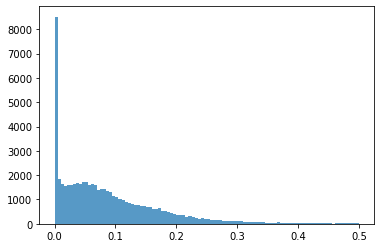

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the energy histogram
x = data['energy']

n, bins, patches = plt.hist(x, bins=100, range=[0,0.5], alpha=0.75)

## Exercise  
* select and print only data corresponding to the process 'phot'
* plot the corresponding energy histogram
* explain the energy spectrum (increase the number of primaries if necessary)

In [110]:
print(data[data['process'] == b'phot'])

[(0,    14, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1.50004401e-04, 0.04707832, 0.82900913, -30.19074817,  -7.57762113, 450.30375121, 22, 7, 3, 2, 0, 0, b'phot', b'NULL', b'NULL')
 (0,    25, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2.60002974e-04, 0.05076265, 0.04427933,  56.75395299,  74.68905714, 449.54347595, 22, 4, 3, 0, 0, 0, b'phot', b'NULL', b'NULL')
 (0,    54, 1, 0, 0, 0, 0, 0, 0, 0, 0, 5.50003216e-04, 0.09804177, 0.21540612, 135.11411555, -89.26803659, 449.93813899, 22, 7, 2, 0, 0, 0, b'phot', b'NULL', b'NULL')
 ...
 (0, 99955, 1, 0, 0, 0, 0, 0, 0, 0, 0, 9.99560003e-01, 0.12855463, 0.69767554,  50.60046241,  31.66879797, 449.89820191, 22, 1, 0, 0, 0, 0, b'phot', b'NULL', b'NULL')
 (0, 99960, 1, 0, 0, 0, 0, 0, 0, 0, 0, 9.99610003e-01, 0.06841858, 0.04605562, -42.32305323,  84.63546728, 449.54520156, 22, 4, 3, 2, 0, 0, b'phot', b'NULL', b'NULL')
 (0, 99983, 1, 0, 0, 0, 0, 0, 0, 0, 0, 9.99840004e-01, 0.03207111, 0.08907771, 155.15247176, 171.9083644 , 449.57665451, 22, 4, 3, 0, 0, 0, b'phot', b'NULL', b'

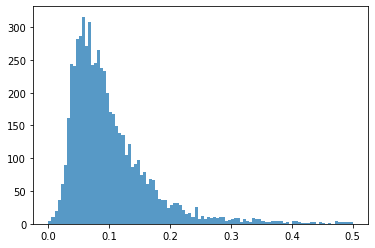

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the energy histogram
x = data[data['process'] == b'phot']['energy']

n, bins, patches = plt.hist(x, bins=100, range=[0,0.5], alpha=0.75)

## GATE ROOT Tree output

In [129]:
import uproot



## GATE Numpy Tree output